In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
plt.style.use("fivethirtyeight")

In [2]:
#path_to_file = './datasets/GlobalDataset2017.csv'
Global = pd.read_csv("./datasets/GlobalDataset2017.csv")

In [3]:
obj_df = Global.select_dtypes(include=['object']).copy()
obj_df.head()

,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,Case Management,Female,18--20,Adult,Adult,Adult,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,MD,Unknown,MD
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,18--20,Adult,-99,-99,KZ,Unknown,KZ


In [4]:
cleanup_nums = {"gender":     {"Female": 0, "Male": 1, "Unknown": 2},
                "majorityStatus": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "majorityStatusAtExploit": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "majorityEntry": {"Adult": 0, "Minor": 1, "Unknown": 2, "-99": 3},
                "Datasource": {"Case Management": 0, "Hotline": 1},
                "RecruiterRelationship":{
                    "Unknown": 3,
                    "-99": 3,
                    "Other": 3,
                    "Friend": 2,
                    "Family/Relative": 0,
                    "Intimate Partner": 1,
                    "Family/Relative; Intimate Partner": 0,
                    "Friend; Other": 2,
                    "Friend; Intimate Partner": 1,
                    "Family/Relative; Friend": 0,
                    "Family/Relative; Unknown": 0,
                    "Intimate Partner; Other": 1,
                    "Family/Relative; Other": 0,
                    "Family/Relative; Friend; Other": 0,
                    "Friend; Intimate Partner; Other": 1,
                    "Intimate Partner; Unknown": 1,
                    "Friend; Unknown": 2
                }
               }

In [5]:
cleanup_citizen = {"citizenship": {"PH": 1,
"ZZ": 0,
"MD": 2,
"UA": 2,
"US": 0,
"ID": 1,
"BY": 2,
"MM": 1,
"KH": 1,
"RO": 2,
"GH": 0,
"KG": 1,
"BG": 2,
"HT": 0,
"UZ": 1,
"AF": 1,
"-99": 6,
"MX": 0,
"GW": 0,
"TH": 1,
"LA": 1,
"CO": 0,
"NG": 0,
"CN": 1,
"LK": 1,
"TJ": 1,
"UG": 0,
"SN": 0,
"KZ": 1,
"SL": 0,
"CD": 0,
"AL": 2,
"ML": 0,
"BF": 0,
"NE": 0,
"CI": 0,
"NP": 1,
"TM": 1,
"BO": 1,
"VN": 1,
"GN": 0,
"ER": 0,
"KR": 1,
"BD": 1,}         
                }

In [6]:
cleanup_exploit =  {"CountryOfExploitation": {"-99": 6,
"US": 5,
"MD": 2,
"UA": 2,
"RU": 2,
"PH": 1,
"ID": 1,
"MY": 1,
"GH": 0,
"AE": 1,
"TH": 1,
"BY": 2,
"SN": 0,
"BG": 2,
"PL": 2,
"HT": 0,
"RO": 2,
"TR": 1,
"SA": 1,
"KZ": 1,
"QA": 1,
"Y1": 1,
"KW": 1,
"MK": 2,
"UZ": 1,
"BA": 2,
"UG": 0,
"JP": 1,
"JO": 1,
"ZZ": 0,
"OM": 1,
"TJ": 1,
"TT": 0,
"AF": 1,
"LB": 1,
"SL": 0,
"KH": 1,
"CZ": 2,
"CN": 1,
"AL": 2,
"SY": 1,
"SG": 1,
"ZA": 0,
"TW": 1,
"IT": 2,
"TM": 1,
"AT": 2,
"BH": 1,
"MU": 0,
"AR": 0,
"DK": 2,
"EG": 0,
"EC": 0,
"CY": 1}
               }

In [7]:
obj_df.replace(cleanup_nums, inplace=True)

In [8]:
obj_df.replace(cleanup_citizen, inplace=True)

In [9]:
obj_df.replace(cleanup_exploit, inplace=True)

In [10]:
obj_df.drop('ageBroad', axis=1, inplace=True)
obj_df.dtypes

Datasource                 int64
gender                     int64
majorityStatus             int64
majorityStatusAtExploit    int64
majorityEntry              int64
citizenship                int64
RecruiterRelationship      int64
CountryOfExploitation      int64
dtype: object

In [11]:
#BEFORE REPLACING: Check the columns and their values...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']].head()


,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,Case Management,Female,Adult,Adult,Adult,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,MD,Unknown,MD
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ
NaN,Case Management,Female,Adult,-99,-99,KZ,Unknown,KZ


In [12]:
#REPLACE...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']]=obj_df[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']]

#AFTER REPLACING: Check the columns and their values...
Global[['Datasource', 'gender', 'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry', 'citizenship', 'RecruiterRelationship', 'CountryOfExploitation']].head()


,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,RecruiterRelationship,CountryOfExploitation
NaN,0,0,0,0,0,1,3,1
NaN,0,0,0,3,3,1,3,1
NaN,0,0,0,3,3,2,3,2
NaN,0,0,0,3,3,1,3,1
NaN,0,0,0,3,3,1,3,1


In [13]:
Global.drop('ageBroad', axis=1, inplace=True)
Global.drop('yearOfRegistration', axis=1, inplace=True)

In [14]:
Global.replace(to_replace=-99, value=0, inplace=True, axis=0)

C:\Users\prapa\Anaconda2\lib\site-packages\pandas\core\generic.py:3786: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


In [15]:
(Global == -99).sum()

Datasource                                0
gender                                    0
majorityStatus                            0
majorityStatusAtExploit                   0
majorityEntry                             0
citizenship                               0
meansOfControlDebtBondage                 0
meansOfControlTakesEarnings               0
meansOfControlRestrictsFinancialAccess    0
meansOfControlThreats                     0
meansOfControlPsychologicalAbuse          0
meansOfControlPhysicalAbuse               0
meansOfControlSexualAbuse                 0
meansOfControlFalsePromises               0
meansOfControlPsychoactiveSubstances      0
meansOfControlRestrictsMovement           0
meansOfControlRestrictsMedicalCare        0
meansOfControlExcessiveWorkingHours       0
meansOfControlUsesChildren                0
meansOfControlThreatOfLawEnforcement      0
meansOfControlWithholdsNecessities        0
meansOfControlWithholdsDocuments          0
meansOfControlOther             

In [16]:
Global.dtypes

Datasource                                int64
gender                                    int64
majorityStatus                            int64
majorityStatusAtExploit                   int64
majorityEntry                             int64
citizenship                               int64
meansOfControlDebtBondage                 int64
meansOfControlTakesEarnings               int64
meansOfControlRestrictsFinancialAccess    int64
meansOfControlThreats                     int64
meansOfControlPsychologicalAbuse          int64
meansOfControlPhysicalAbuse               int64
meansOfControlSexualAbuse                 int64
meansOfControlFalsePromises               int64
meansOfControlPsychoactiveSubstances      int64
meansOfControlRestrictsMovement           int64
meansOfControlRestrictsMedicalCare        int64
meansOfControlExcessiveWorkingHours       int64
meansOfControlUsesChildren                int64
meansOfControlThreatOfLawEnforcement      int64
meansOfControlWithholdsNecessities      

In [17]:
X = Global

In [18]:
km3 = KMeans(n_clusters=3)

#Fit model on data
km3.fit(X)

#Get the labels

labels = km3.labels_

labels

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
km3.predict(Global)

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
pd.value_counts(labels)

1    24696
2    12939
0     9467
dtype: int64

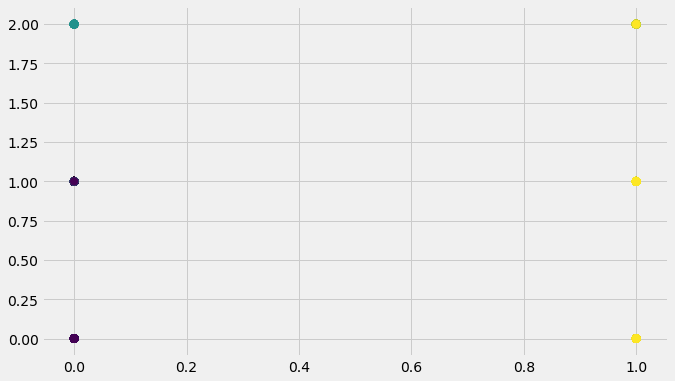

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=68, c=labels);

In [22]:
from sklearn.decomposition import TruncatedSVD

In [23]:
trun = TruncatedSVD(n_components=2)

Xt = trun.fit_transform(X.values)

In [24]:
Xt

array([[ 2.31476545, -0.54409522],
       [ 4.78367144, -2.61505975],
       [ 5.61176796, -2.17492448],
       ..., 
       [ 8.33933054,  1.59594368],
       [ 8.30552834,  1.6510857 ],
       [ 8.380942  ,  1.62341606]])

In [25]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
pd.value_counts(labels)

1    24696
2    12939
0     9467
dtype: int64

In [27]:
#Centriod values
centriods = km3.cluster_centers_


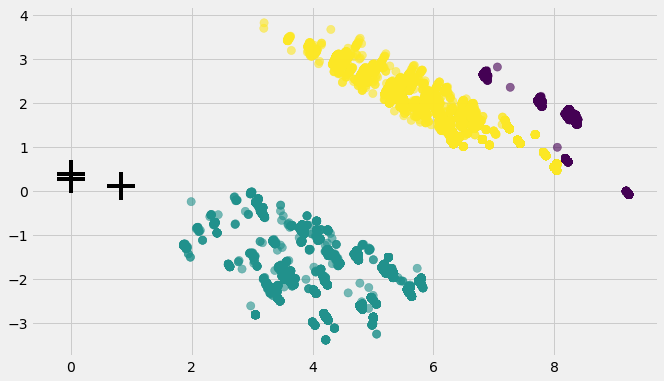

In [28]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels, alpha= .6)
plt.scatter(centriods[ : , 0], centriods[ : , 1], s = 800, marker="+", c = "black")
plt.show()

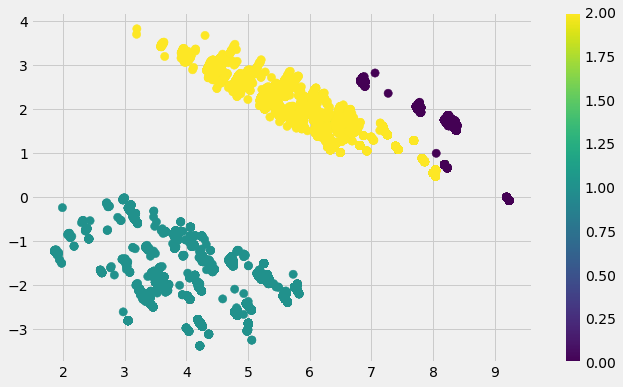

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels)
plt.colorbar();

In [30]:
#Intialize the KMeans algorithm with 4 clusters

km4 = KMeans(n_clusters=4)

#Fit model on data
km4.fit(Xt)

#Get the labels

labels = km4.labels_

labels

array([3, 1, 1, ..., 0, 0, 0])

In [31]:
#The counts of labels
pd.value_counts(labels)

1    17106
2    11486
0    10920
3     7590
dtype: int64

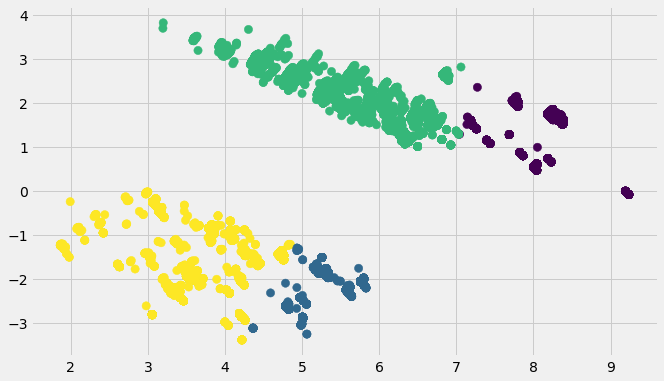

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels);

In [33]:
#Centriod values
cents4 = km4.cluster_centers_

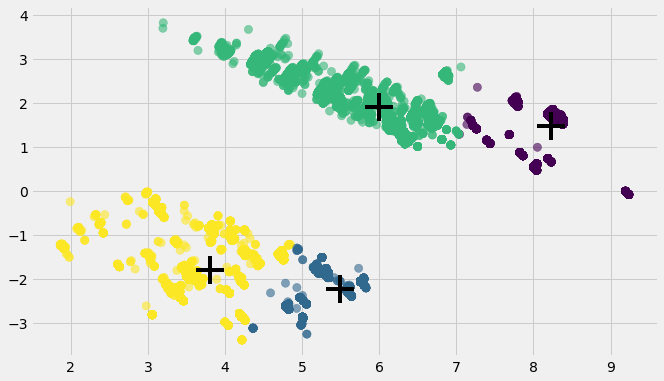

In [34]:
#Visualize the data with the color-encoded labels along with the centriods

plt.figure(figsize=(10,6))
plt.scatter(Xt[:,0], Xt[:,1], s=68, c=labels, alpha= .6)
plt.scatter(cents4[ : , 0], cents4[ : , 1], s = 800, marker="+", c = "black")
plt.show()

In [ ]:
silhouette_score(Xt, labels)

In [32]:
km3.inertia_

217123.49544782718

In [ ]:
km4.inertia_

In [33]:
data = X.copy()

data["labels"] = labels

In [34]:
data.groupby("labels").mean()

,Datasource,gender,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,...,typeOfSexRemoteInteractiveServices,typeOfSexPrivateSexualServices,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
labels,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.273993,2.476282,3.000000,2.943681,1.215385,0.002381,0.000000,0.000000,0.000824,...,0.0,0.000000,0.000000,2.953297,6.000000,0.000092,0.046520,0.000000,0.106777,0.846612
1,0.000000,0.311613,0.515560,2.993227,2.998599,1.803819,0.000117,0.000175,0.000000,0.001226,...,0.0,0.000000,0.000000,2.998774,1.758860,0.000000,0.001226,0.000000,0.024639,0.974134
2,0.933136,0.089413,0.631551,1.588107,1.919119,0.092199,0.032910,0.072871,0.010448,0.137733,...,0.0,0.000958,0.005572,2.537785,5.066864,0.098903,0.030559,0.080533,0.022985,0.740205
3,0.012419,0.548421,0.527282,2.621482,0.889417,1.034351,0.079006,0.186154,0.000000,0.147179,...,0.0,0.000000,0.000000,2.771436,1.042410,0.000132,0.068173,0.053376,0.234377,0.643942


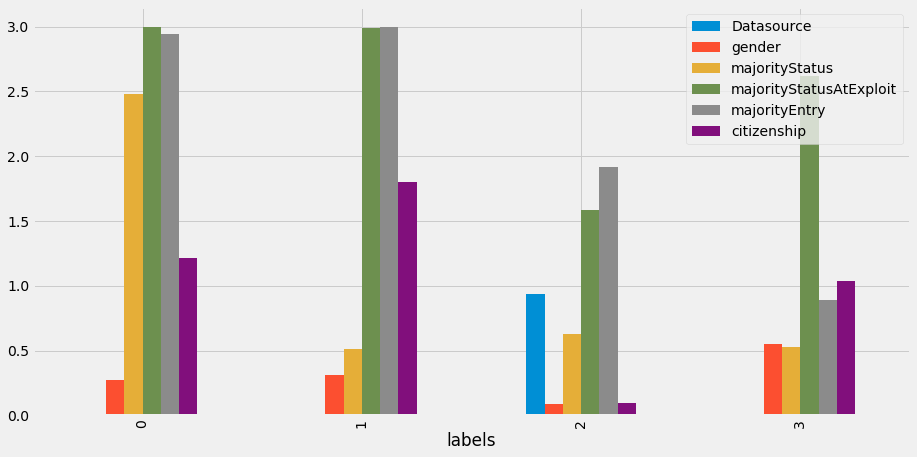

In [35]:
data.groupby("labels").mean().iloc[:, :6].plot(kind="bar", figsize = (14, 7))

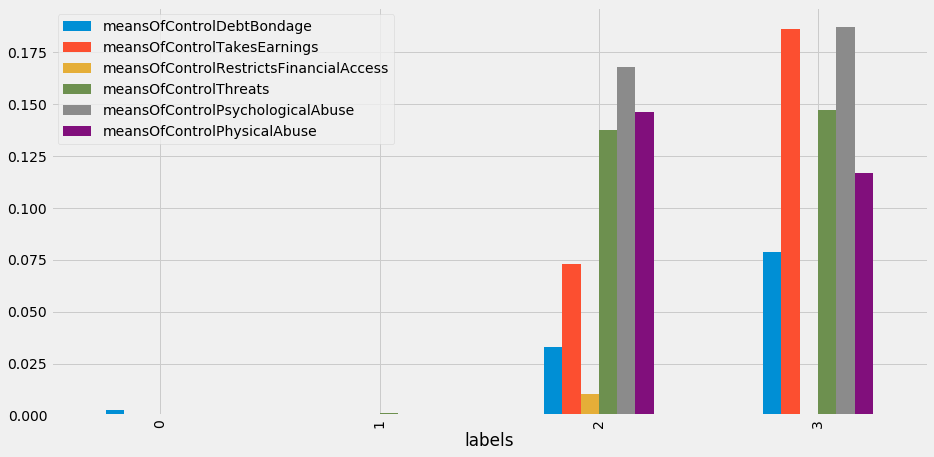

In [36]:
data.groupby("labels").mean().iloc[:, 6:12].plot(kind="bar", figsize = (14, 7))

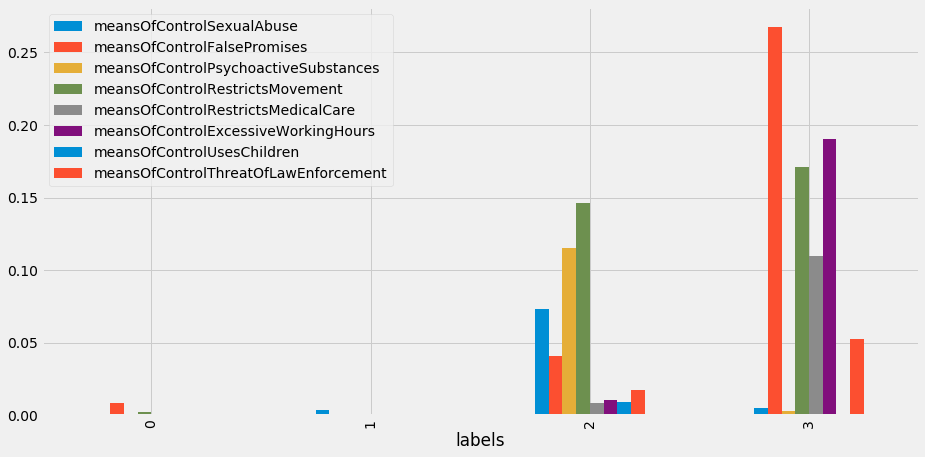

In [37]:
data.groupby("labels").mean().iloc[:, 12:20].plot(kind="bar", figsize = (14, 7))

In [ ]:
silhouette_score(Xt, labels)

In [ ]:
#Intialize range of cluster values from 2 to 16
cluster_range = range(2, 17)

#Intialize list to store silhouette scores

s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(Xt)
    labels = model.labels_
    score = silhouette_score(Xt, labels)
    s_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, s_scores, linewidth = 6, alpha = .8, c = "r")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores");

In [ ]:
km4.inertia_

In [ ]:

cluster_range = range(2, 17)
#Intialize list to store inertia scores

i_scores = []

for cluster in cluster_range:
    model = KMeans(n_clusters=cluster)
    model.fit(X)
    
    score = model.inertia_
    i_scores.append(score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, i_scores, linewidth = 6, alpha = .8, c = "g")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores");